# DataViz (Atelier)

## **Les bibliothèques de visualisation en Python**

### **1. Matplotlib**

- **Description** : Bibliothèque classique pour les graphiques 2D :
    - Fonctionnelle (`pyplot`) : Facile pour des graphiques simples.
    - Orientée objet : Permet une personnalisation plus fine des figures et axes.
- **Cas d'utilisation** : Création de graphiques statiques hautement personnalisables.
- **Documentation** : [Matplotlib](https://matplotlib.org/stable/contents.html)

---

### **2. Plotly**

- **Description** : Bibliothèque interactive pour des graphiques 2D/3D, intégrable dans des applications web et desktop :
    - API Python pour créer et personnaliser les graphiques.
    - Intégration avec Dash pour créer des tableaux de bord interactifs.
- **Cas d'utilisation** : Visualisations interactives (nuages de points, séries temporelles, cartes, etc.).
- **Documentation** : [Plotly Python](https://plotly.com/python/)

---

### **3. Seaborn**

- **Description** : Basée sur Matplotlib, elle simplifie la création de graphiques statistiques.
- **API** :
    - Fonctionnelle : Simple pour des visualisations statistiques (heatmaps, boxplots, etc.).
    - Intégration avec Pandas pour les DataFrames.
- **Cas d'utilisation** : Visualisation et analyse statistique des données.
- **Documentation** : [Seaborn](https://seaborn.pydata.org/)

---

### **4. Bokeh**

- **Description** : Bibliothèque spécialisée dans les graphiques interactifs et les applications web :
    - Haut niveau : Pour des graphiques rapides.
    - Bas niveau : Pour une personnalisation détaillée des figures et interactions.
- **Cas d'utilisation** : Applications web interactives avec des graphiques dynamiques.
- **Documentation** : [Bokeh](https://docs.bokeh.org/en/latest/)


Un excellent dataset pour visualiser l'évolution des prix des cryptomonnaies ou des actions peut être obtenu à partir d'APIs ou de plateformes comme Yahoo Finance ou Alpha Vantage. Pour simplifier, nous allons utiliser la bibliothèque **yfinance** pour télécharger les données financières.


In [ ]:
%%bash
pip install yfinance

In [ ]:
import yfinance as yf

# Télécharger les données du Bitcoin (BTC-USD) ou d'une action (ex: AAPL)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")
stock_data = yf.download("AAPL", start="2020-01-01", end="2024-12-05")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Statistiques descriptives
print("Statistiques descriptives :")
print(crypto_data.describe())

# Informations générales
print("\nInformations générales :")
crypto_data.info()

# Nombre de lignes et colonnes
rows, columns = crypto_data.shape
print(f"\nNombre de lignes : {rows}, Nombre de colonnes : {columns}")

# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(crypto_data.isnull().sum())

# Aperçu des premières lignes
print("\nAperçu des premières lignes :")
print(crypto_data.head())


Statistiques descriptives :
Price      Adj Close         Close          High           Low          Open  \
Ticker       BTC-USD       BTC-USD       BTC-USD       BTC-USD       BTC-USD   
count    1800.000000   1800.000000   1800.000000   1800.000000   1800.000000   
mean    35385.841077  35385.841077  36118.600266  34532.349534  35337.313032   
std     19844.324116  19844.324116  20253.887892  19352.716110  19801.095054   
min      4970.788086   4970.788086   5331.833984   4106.980957   5002.578125   
25%     19446.168945  19446.168945  19945.528320  19122.000000  19442.588379   
50%     31396.105469  31396.105469  32234.134766  30257.106445  31338.058594   
75%     49330.585938  49330.585938  50649.712891  47722.438477  49300.525391   
max     98997.664062  98997.664062  99655.500000  97232.890625  99006.742188   

Price         Volume  
Ticker       BTC-USD  
count   1.800000e+03  
mean    3.267427e+10  
std     1.887048e+10  
min     5.331173e+09  
25%     2.050413e+10  
50%     2.

Les colonnes principales du dataset sont :
- **Open** : Prix à l'ouverture
- **High** : Prix le plus élevé
- **Low** : Prix le plus bas
- **Close** : Prix à la clôture
- **Adj Close** : Prix ajusté à la clôture
- **Volume** : Volume d'échange

### Préparation des données
On va travailler uniquement avec la colonne **Close** pour tracer l'évolution des prix.


### Visualisation des prix



## Courbe avec Matplotlib

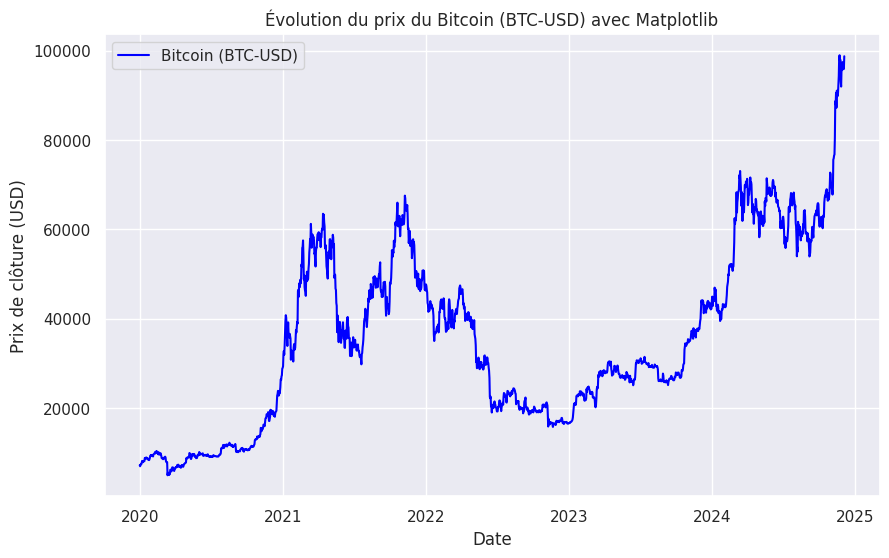

In [ ]:
import matplotlib.pyplot as plt

# Extraire les prix de clôture
crypto_data['Date'] = crypto_data.index

crypto_close = crypto_data[['Date', 'Close']].reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.plot(crypto_close['Date'], crypto_close['Close'], label='Bitcoin (BTC-USD)', color='blue')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.title("Évolution du prix du Bitcoin (BTC-USD) avec Matplotlib")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


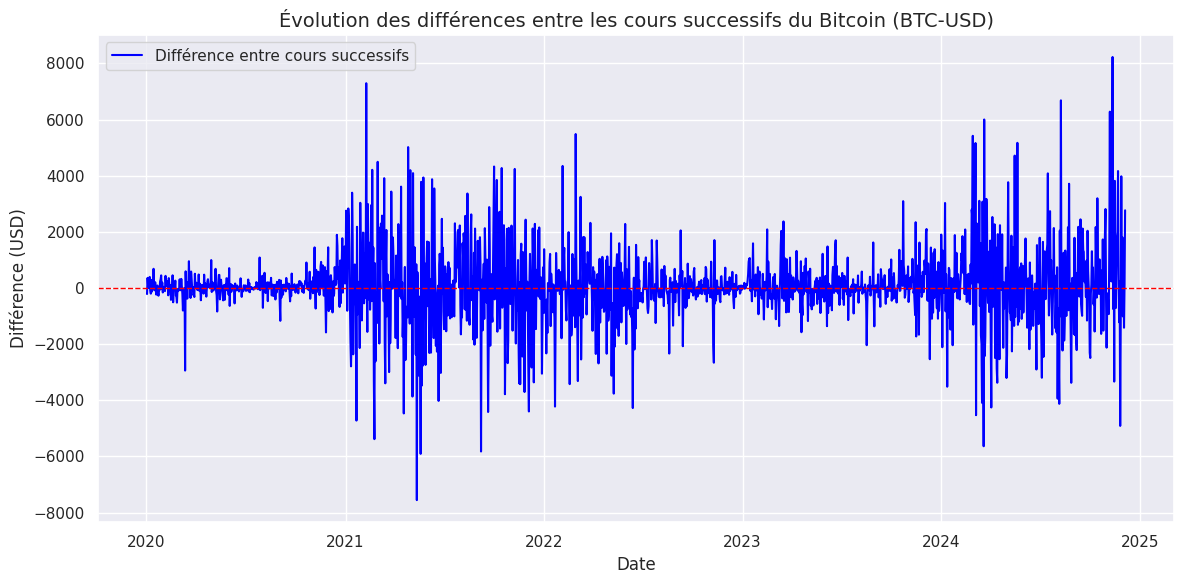

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour la différence entre le cours actuel et le précédent
crypto_data['Difference'] = crypto_data['Close'].diff()

# Tracer la courbe de la différence entre les cours successifs
plt.figure(figsize=(12, 6))
plt.plot(crypto_data.index, crypto_data['Difference'], label='Différence entre cours successifs', color='blue', linewidth=1.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Ligne horizontale pour zéro
plt.title("Évolution des différences entre les cours successifs du Bitcoin (BTC-USD)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Différence (USD)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


#### 2. **Seaborn**

[*********************100%***********************]  1 of 1 completed


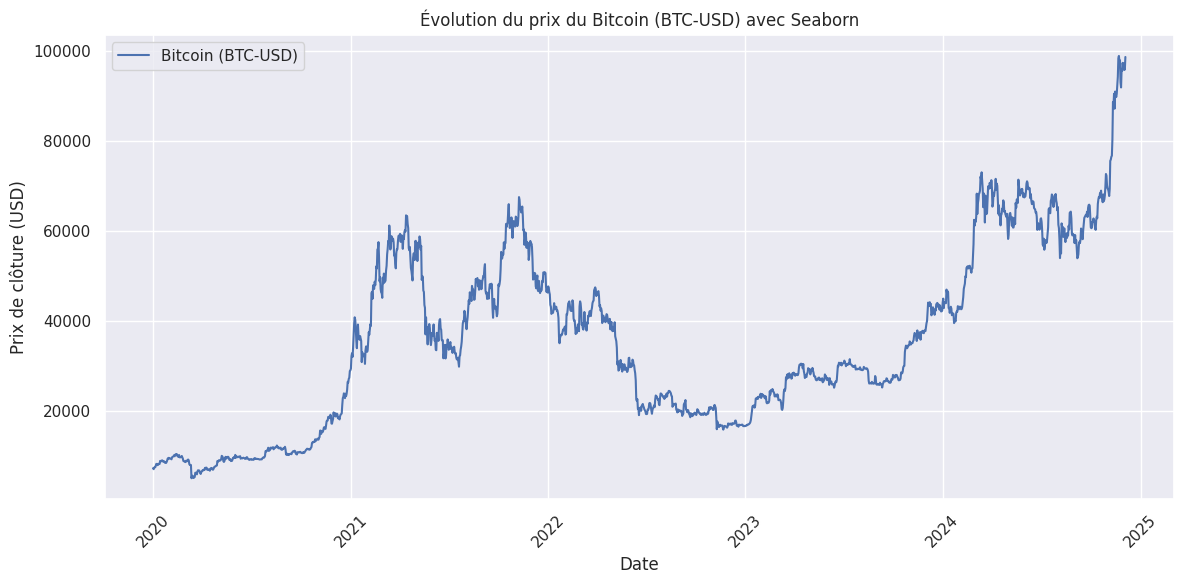

In [ ]:
import yfinance as yf
import seaborn as sns

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Convertir la colonne 'Close' en série plate
close_series = crypto_data['Close'].values.flatten()

# Créer un tableau de dates correspondant
dates = crypto_data.index

# Si vraiment vous voulez utiliser Seaborn
plt.figure(figsize=(12,6))
sns.lineplot(x=dates, y=close_series, label='Bitcoin (BTC-USD)')
plt.xlabel('Date')
plt.ylabel('Prix de clôture (USD)')
plt.title("Évolution du prix du Bitcoin (BTC-USD) avec Seaborn")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour la différence entre le cours actuel et le précédent
crypto_data['Difference'] = crypto_data['Close'].diff()

# Tracer la courbe des différences avec Plotly Express
fig = px.line(
    crypto_data,
    x=crypto_data.index,
    y='Difference',
    title="Évolution des différences entre les cours successifs du Bitcoin (BTC-USD)",
    labels={'Difference': "Différence (USD)", 'x': "Date"},
)

# Ajouter une ligne horizontale à zéro
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Équilibre")

# Personnalisation supplémentaire
fig.update_traces(line=dict(color="blue"))
fig.update_layout(title_font_size=18, xaxis_title="Date", yaxis_title="Différence (USD)")

# Afficher le graphique
fig.show()

[*********************100%***********************]  1 of 1 completed


## Courbe avec Plotly

In [ ]:
import yfinance as yf
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Convertir la colonne 'Close' en série plate
close_series = crypto_data['Close'].values.flatten()

# Créer un tableau de dates correspondant
dates = crypto_data.index

# Création du graphique interactif avec Plotly Express
fig = px.line(x=dates, y=close_series,
              title="Évolution du prix du Bitcoin (BTC-USD) avec Plotly",
              labels={'x': 'Date', 'y': 'Prix de clôture (USD)'},
              template='plotly_white')

# Personnalisation du layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Prix de clôture (USD)',
    hoverlabel=dict(bgcolor='white', font_size=16),
    hovermode='x'
)

# Affichage du graphique
fig.show()

[*********************100%***********************]  1 of 1 completed


## Courbe avec Bokeh

In [ ]:
import yfinance as yf
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Réinitialiser l'index pour avoir 'Date' comme colonne
crypto_close = crypto_data.reset_index()

# Configurer la sortie pour un notebook (si nécessaire)
output_notebook()

# Créer la figure Bokeh
p = figure(
    title="Évolution du prix du Bitcoin (BTC-USD) avec Bokeh",
    x_axis_type='datetime',
    width=800,
    height=400
)

# Tracer la ligne
p.line(
    crypto_close['Date'],
    crypto_close['Close'],
    legend_label='BTC-USD',
    line_width=2,
    color='blue'
)

# Personnaliser les axes
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Prix de clôture (USD)"

# Ajouter une légende
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Afficher le graphique
show(p)

[*********************100%***********************]  1 of 1 completed


# Distribution

# Histogramme avec Matplotlib

[*********************100%***********************]  1 of 1 completed


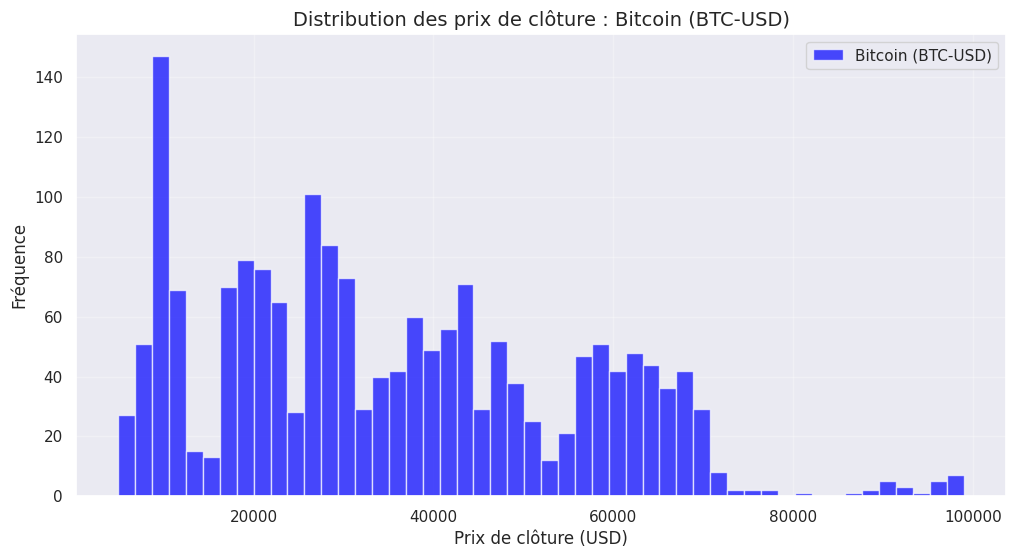

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Télécharger les données
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Extraire les prix de clôture et les dates
crypto_data['Date'] = crypto_data.index
crypto_close = crypto_data[['Date', 'Close']].reset_index(drop=True)

# Histogramme des prix de clôture
plt.figure(figsize=(12, 6))

# Histogramme pour les crypto-monnaies
plt.hist(
    crypto_close['Close'],
    bins=50,
    alpha=0.7,
    label='Bitcoin (BTC-USD)',
    color='blue'
)

# Ajouter les titres et la légende
plt.title("Distribution des prix de clôture : Bitcoin (BTC-USD)", fontsize=14)
plt.xlabel("Prix de clôture (USD)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Afficher le graphique
plt.show()


## Histogramme avec Seaborn

[*********************100%***********************]  1 of 1 completed


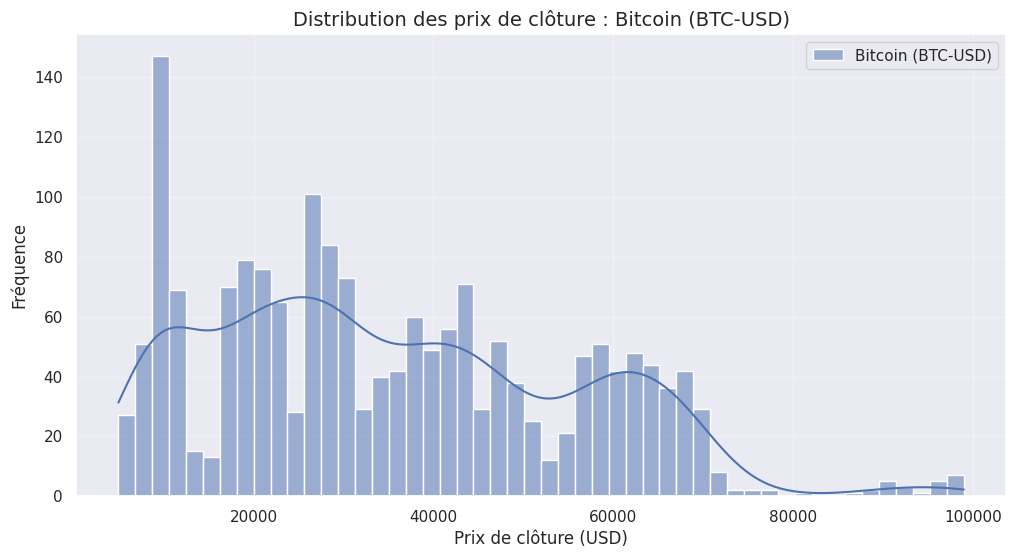

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Télécharger les données
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Extraire les prix de clôture et les dates
crypto_data['Date'] = crypto_data.index
crypto_close = crypto_data[['Date', 'Close']].reset_index(drop=True)

# Histogramme avec Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(
    crypto_close['Close'],
    bins=50,
    kde=True,  # Ajouter la courbe de densité
    color='blue',
    label='Bitcoin (BTC-USD)'
)

# Ajouter les titres et la légende
plt.title("Distribution des prix de clôture : Bitcoin (BTC-USD)", fontsize=14)
plt.xlabel("Prix de clôture (USD)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Afficher le graphique
plt.show()

## Histogramme avec Plotly Express

In [ ]:
import yfinance as yf
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Vérifier si les données sont disponibles
if crypto_data.empty:
    raise ValueError("Aucune donnée disponible pour la période spécifiée.")

# Partie 1 : Graphique linéaire (inchangée)
close_series = crypto_data['Close'].values.flatten()  # Convertir en série 1D
dates = crypto_data.index


# S'assurer que les données sont 1D
close_series_hist = crypto_data['Close'].values.flatten()  # Série plate pour l'histogramme

fig = px.histogram(
    x=close_series_hist,  # Passer des données 1D pour l'histogramme
    nbins=50,  # Nombre de bins
    title="Distribution des prix de clôture : Bitcoin (BTC-USD)",
    labels={'x': 'Prix de clôture (USD)', 'y': 'Fréquence'},
    template='plotly_white'
)

fig.update_layout(
    xaxis_title="Prix de clôture (USD)",
    yaxis_title="Fréquence",
    bargap=0.1  # Espacement entre les barres
)

fig.show()



[*********************100%***********************]  1 of 1 completed


## Histogramme avec Bokeh

In [ ]:
import yfinance as yf
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
import numpy as np  # Importer NumPy

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Réinitialiser l'index pour avoir 'Date' comme colonne
crypto_close = crypto_data.reset_index()

# Configurer la sortie pour un notebook (si nécessaire)
output_notebook()

# Préparer les données pour l'histogramme
hist, edges = np.histogram(
    crypto_close['Close'].dropna(),  # Retirer les valeurs manquantes
    bins=50  # Nombre de bins
)

# Créer la figure pour l'histogramme
p = figure(
    title="Distribution des prix de clôture : Bitcoin (BTC-USD)",
    width=800,
    height=400
)

# Ajouter les barres de l'histogramme
p.quad(
    top=hist,
    bottom=0,
    left=edges[:-1],
    right=edges[1:],
    fill_color="blue",
    line_color="white",
    legend_label="Fréquence"
)

# Personnaliser les axes
p.xaxis.axis_label = "Prix de clôture (USD)"
p.yaxis.axis_label = "Fréquence"

# Afficher les deux graphiques ensemble
show(p)


[*********************100%***********************]  1 of 1 completed


## **Carte Thermique (Heatmap) des Variations Journalières**
   - Montrez les variations quotidiennes en pourcentage (prix de clôture par rapport à l'ouverture) sur une carte thermographique.
   - **Utilisation :** Pour repérer rapidement les périodes volatiles.


## Variations en pourcentage (Heatmap) avec Matplotlib

[*********************100%***********************]  1 of 1 completed
<ipython-input-143-a23f611ebc9c>:20: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



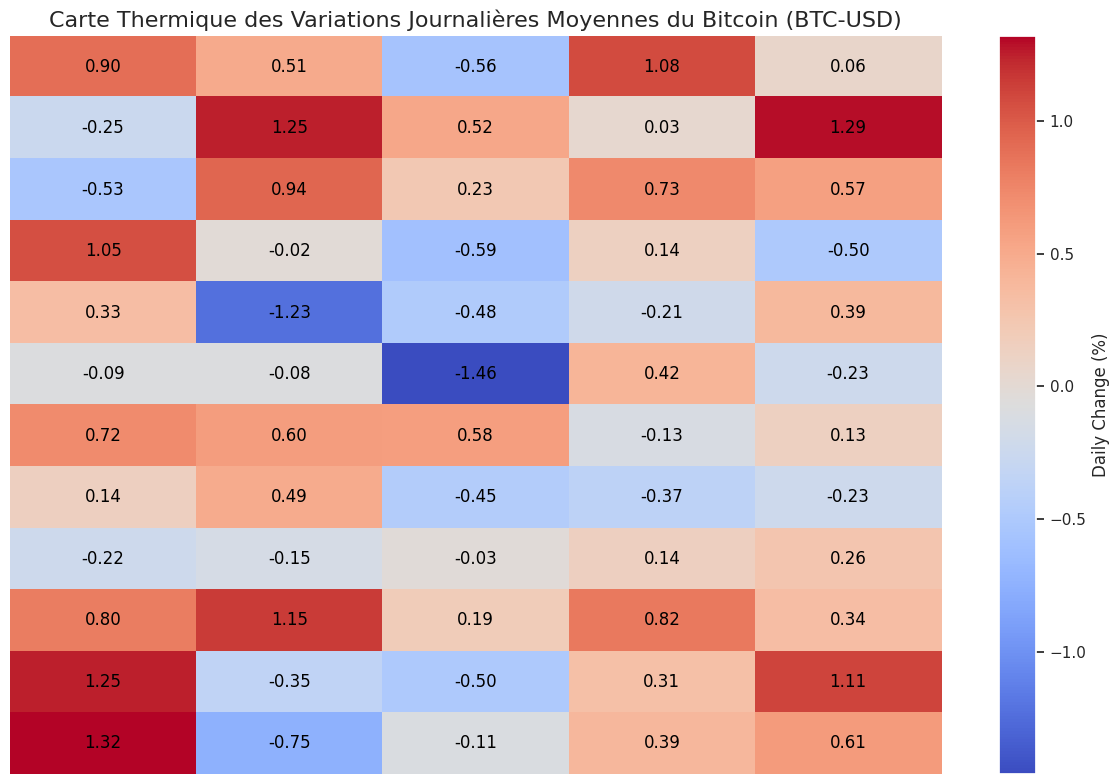

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Calculer les variations journalières en pourcentage
crypto_data['Daily Change (%)'] = ((crypto_data['Close'] - crypto_data['Open']) / crypto_data['Open']) * 100

# Ajouter les colonnes pour mois et années
crypto_data['Year'] = crypto_data.index.year
crypto_data['Month'] = crypto_data.index.month

# Trier les données pour éviter les warnings sur les MultiIndex
crypto_data = crypto_data.sort_values(by=['Year', 'Month'])

# Créer un tableau croisé pour la heatmap
heatmap_data = crypto_data.pivot_table(
    values='Daily Change (%)',
    index='Month',
    columns='Year',
    aggfunc="mean"
)

# Convertir les mois en noms lisibles
month_names = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
heatmap_data.index = month_names[:len(heatmap_data)]  # Ajuster selon les mois présents dans les données

# Aplatir le MultiIndex des colonnes
heatmap_data.columns = heatmap_data.columns.map(str)  # Convertir les années en chaînes de caractères

# Tracer la heatmap avec Matplotlib
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap("coolwarm")
im = plt.imshow(heatmap_data, cmap=cmap, aspect="auto")

# Ajouter une barre de couleur
cbar = plt.colorbar(im)
cbar.set_label("Daily Change (%)")

# Ajouter les valeurs dans les cellules
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        if not np.isnan(value):  # Vérifier que la valeur n'est pas NaN
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Masquer les axes
plt.axis('off')

# Ajouter le titre sans les axes
plt.title("Carte Thermique des Variations Journalières Moyennes du Bitcoin (BTC-USD)", fontsize=16)
plt.tight_layout()

# Afficher la heatmap
plt.show()



## Variations en pourcentage (Heatmap)  avec Seaborn

Voici un script complet et indépendant pour créer une carte thermographique des variations journalières en pourcentage avec Seaborn.


[*********************100%***********************]  1 of 1 completed
<ipython-input-118-57631ee8bcf4>:20: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



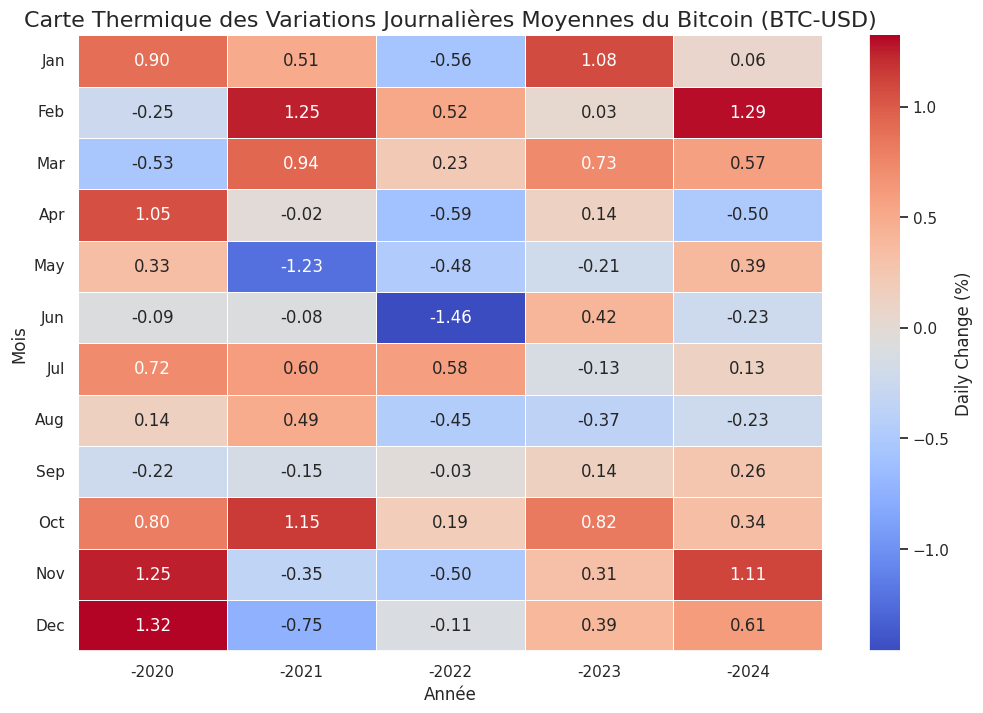

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Calculer les variations journalières en pourcentage
crypto_data['Daily Change (%)'] = ((crypto_data['Close'] - crypto_data['Open']) / crypto_data['Open']) * 100

# Ajouter les colonnes pour mois et années
crypto_data['Year'] = crypto_data.index.year
crypto_data['Month'] = crypto_data.index.month

# Trier les données pour éviter les warnings sur les MultiIndex
crypto_data = crypto_data.sort_values(by=['Year', 'Month'])

# Créer un tableau croisé pour la heatmap
heatmap_data = crypto_data.pivot_table(
    values='Daily Change (%)',
    index='Month',
    columns='Year',
    aggfunc="mean"  # Utilisation de "mean" au lieu de np.mean
)

# Convertir les mois en noms lisibles
month_names = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
heatmap_data.index = month_names[:len(heatmap_data)]  # Ajuster selon les mois présents dans les données

# Tracer la heatmap avec Seaborn
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,  # Afficher les valeurs dans les cellules
    fmt=".2f",   # Format des valeurs
    linewidths=.5,
    cbar_kws={'label': 'Daily Change (%)'}
)
ax.set_title("Carte Thermique des Variations Journalières Moyennes du Bitcoin (BTC-USD)", fontsize=16)
ax.set_xlabel("Année")
ax.set_ylabel("Mois")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Garder les étiquettes des mois horizontales
sns.despine()


## Variations en pourcentage (Heatmap) avec Plotly

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Calculer les variations journalières en pourcentage
crypto_data['Daily Change (%)'] = ((crypto_data['Close'] - crypto_data['Open']) / crypto_data['Open']) * 100

# Ajouter les colonnes pour mois et années
crypto_data['Year'] = crypto_data.index.year
crypto_data['Month'] = crypto_data.index.month

# Trier les données pour éviter les warnings sur les MultiIndex
crypto_data = crypto_data.sort_values(by=['Year', 'Month'])

# Créer un tableau croisé pour la heatmap
heatmap_data = crypto_data.pivot_table(
    values='Daily Change (%)',
    index='Month',
    columns='Year',
    aggfunc="mean"  # Utilisation de "mean" au lieu de np.mean
)

# Convertir les mois en noms lisibles
month_names = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]
heatmap_data.index = month_names[:len(heatmap_data)]  # Ajuster selon les mois présents dans les données

# Créer la heatmap avec Plotly
fig = px.imshow(
    heatmap_data.values,
    labels=dict(x="Year", y="Month", color="Daily Change (%)"),
    x=heatmap_data.columns,  # Années
    y=heatmap_data.index,    # Mois
    text_auto=True,          # Afficher les valeurs dans les cellules
    aspect="auto"            # Ajuster l'aspect
)

fig.update_layout(
    title="Carte Thermique des Variations Journalières Moyennes du Bitcoin (BTC-USD)",
    xaxis_title="Année",
    yaxis_title="Mois",
    xaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.columns))), ticktext=heatmap_data.columns)
)

# Afficher la heatmap
fig.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-112-9728db8575bd>:20: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



## **Matrice de Corrélation  (Heatmap) entre Variables** avec Matplotlib
   - Créez une matrice de corrélation entre les colonnes du dataset comme `Open`, `Close`, `High`, `Low`, et `Volume`.
   - **Utilisation :** Identifier les relations entre les différentes variables.




[*********************100%***********************]  1 of 1 completed


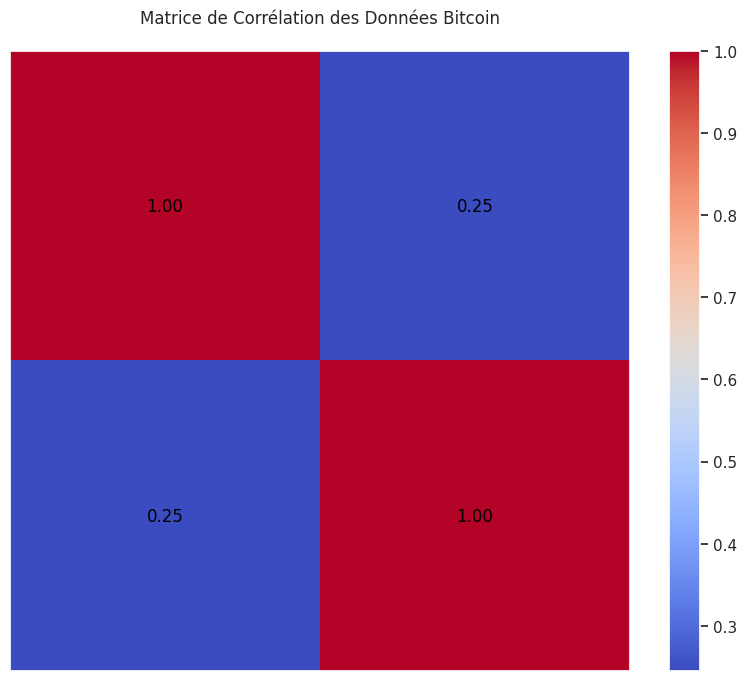

Price              Close    Volume
Ticker           BTC-USD   BTC-USD
Price  Ticker                     
Close  BTC-USD  1.000000  0.245047
Volume BTC-USD  0.245047  1.000000


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Sélectionner les colonnes d'intérêt
columns_of_interest = ['Close', 'Volume']
crypto_data = crypto_data[columns_of_interest]

# Calculer la matrice de corrélation
correlation_matrix = crypto_data.corr()

# Afficher la matrice de corrélation avec les valeurs dans les cellules
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Ajouter les valeurs de corrélation dans les cellules
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Supprimer les ticks des axes
plt.xticks([])  # Supprime les ticks horizontaux
plt.yticks([])  # Supprime les ticks verticaux
plt.title('Matrice de Corrélation des Données Bitcoin', pad=20)
plt.show()

# Afficher la matrice dans la console
print(correlation_matrix)




## Matrice de Corrélation  (Heatmap) entre Variables avec Plotly

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Sélectionner les colonnes d'intérêt
columns_of_interest = ['Close', 'Volume']
crypto_data = crypto_data[columns_of_interest]

# Calculer la matrice de corrélation
correlation_matrix = crypto_data.corr()

# Créer la heatmap de la matrice de corrélation avec Plotly Express
fig = px.imshow(
    correlation_matrix.values,
    labels=dict(x="Variables", y="Variables", color="Coefficient de Corrélation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    text_auto=True,
    aspect="auto",
    color_continuous_scale="Viridis"
)

fig.update_layout(
    title="Matrice de Corrélation entre Close et Volume",
    xaxis_title="Variables",
    yaxis_title="Variables"
)

# Afficher la heatmap
fig.show()


[*********************100%***********************]  1 of 1 completed


## Matrice de Corrélation  (Heatmap) entre Variables avec Seaborn

> Ajouter une citation

> Ajouter une citation





[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

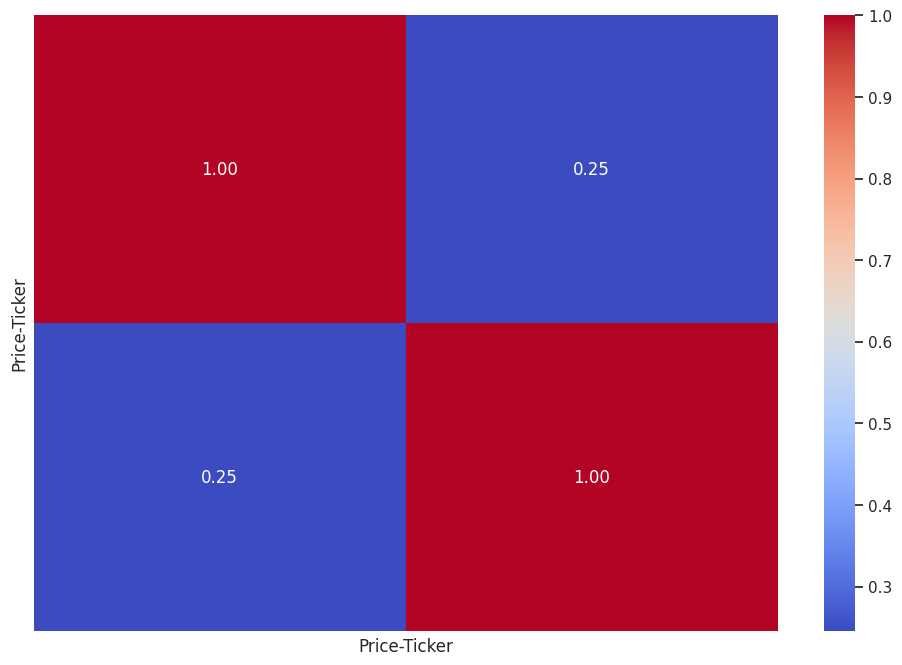

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Sélectionner les colonnes d'intérêt
columns_of_interest = ['Close', 'Volume']
crypto_data = crypto_data[columns_of_interest]

# Calculer la matrice de corrélation
correlation_matrix = crypto_data.corr()

# Afficher la matrice de corrélation avec Seaborn
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)



## **Distribution des valeurs catégoriques (Bar) avec Matplotlib**

[*********************100%***********************]  1 of 1 completed


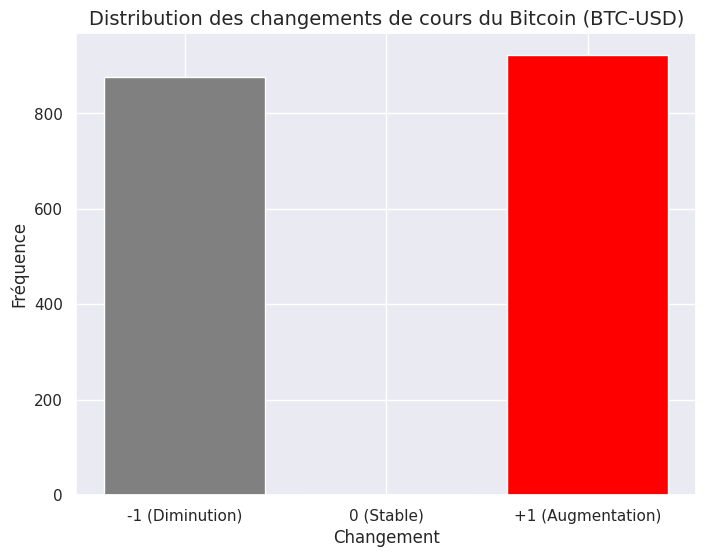

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour indiquer l'évolution (+1, 0, -1)
crypto_data['Change'] = 0  # Initialiser la colonne
crypto_data.loc[crypto_data.index[1:], 'Change'] = np.where(
    crypto_data['Close'].iloc[1:].values > crypto_data['Close'].iloc[:-1].values, 1,  # +1 si augmentation
    np.where(crypto_data['Close'].iloc[1:].values < crypto_data['Close'].iloc[:-1].values, -1, 0)  # -1 si diminution, 0 si stable
).flatten()  # Aplatir le tableau pour éviter les erreurs de diffusion

# Calculer la distribution des valeurs (+1, 0, -1)
change_counts = crypto_data['Change'].value_counts()

# Afficher un graphique en barres avec Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(change_counts.index, change_counts.values, color=['red', 'grey', 'green'])
plt.title("Distribution des changements de cours du Bitcoin (BTC-USD)", fontsize=14)
plt.xlabel("Changement", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(ticks=[-1, 0, 1], labels=["-1 (Diminution)", "0 (Stable)", "+1 (Augmentation)"])
plt.show()



## **Distribution des valeurs catégoriques (Bar) avec Plotly**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour indiquer l'évolution (+1, 0, -1)
crypto_data['Change'] = 0  # Initialiser la colonne
crypto_data.loc[crypto_data.index[1:], 'Change'] = np.where(
    crypto_data['Close'].iloc[1:].values > crypto_data['Close'].iloc[:-1].values, 1,  # +1 si augmentation
    np.where(crypto_data['Close'].iloc[1:].values < crypto_data['Close'].iloc[:-1].values, -1, 0)  # -1 si diminution, 0 si stable
).flatten()  # Aplatir le tableau pour éviter les erreurs de diffusion

# Calculer la distribution des valeurs (+1, 0, -1)
change_counts = crypto_data['Change'].value_counts().reset_index()
change_counts.columns = ['Change', 'Count']

# Afficher un graphique en barres avec Plotly Express
fig_bar = px.bar(change_counts, x='Change', y='Count', color='Change',
                 labels={'Change': 'Changement', 'Count': 'Fréquence'},
                 title="Distribution des changements de cours du Bitcoin (BTC-USD)",
                 color_discrete_map={-1: 'red', 0: 'grey', 1: 'green'})
fig_bar.show()


[*********************100%***********************]  1 of 1 completed


## **Distribution des valeurs catégoriques (Pie) avec Matplotlib**

[*********************100%***********************]  1 of 1 completed


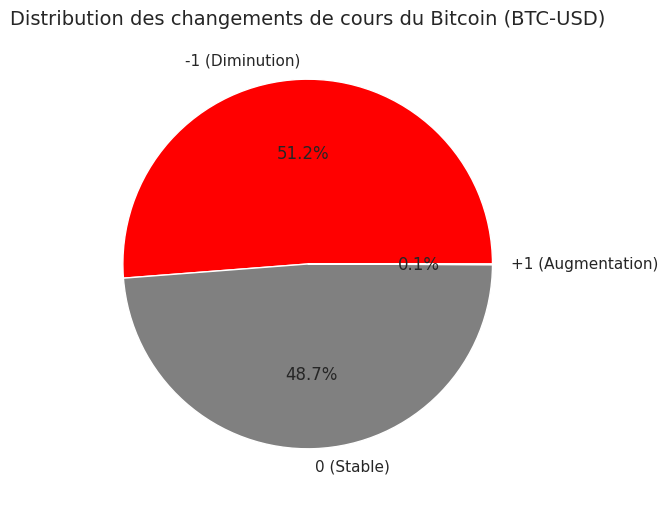

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour indiquer l'évolution (+1, 0, -1)
crypto_data['Change'] = 0  # Initialiser la colonne
crypto_data.loc[crypto_data.index[1:], 'Change'] = np.where(
    crypto_data['Close'].iloc[1:].values > crypto_data['Close'].iloc[:-1].values, 1,  # +1 si augmentation
    np.where(crypto_data['Close'].iloc[1:].values < crypto_data['Close'].iloc[:-1].values, -1, 0)  # -1 si diminution, 0 si stable
).flatten()  # Aplatir le tableau pour éviter les erreurs de diffusion

# Calculer la distribution des valeurs (+1, 0, -1)
change_counts = crypto_data['Change'].value_counts()

# Définir les couleurs et les étiquettes
colors = ['red', 'grey', 'green']
labels = ["-1 (Diminution)", "0 (Stable)", "+1 (Augmentation)"]

# Afficher un graphique en secteurs avec Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(change_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Distribution des changements de cours du Bitcoin (BTC-USD)", fontsize=14)
plt.show()


## **Distribution des valeurs catégoriques (Pie) avec Plotly**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px

# Télécharger les données du Bitcoin (BTC-USD)
crypto_data = yf.download("BTC-USD", start="2020-01-01", end="2024-12-05")

# Ajouter une colonne pour indiquer l'évolution (+1, 0, -1)
crypto_data['Change'] = 0  # Initialiser la colonne
crypto_data.loc[crypto_data.index[1:], 'Change'] = np.where(
    crypto_data['Close'].iloc[1:].values > crypto_data['Close'].iloc[:-1].values, 1,  # +1 si augmentation
    np.where(crypto_data['Close'].iloc[1:].values < crypto_data['Close'].iloc[:-1].values, -1, 0)  # -1 si diminution, 0 si stable
).flatten()  # Aplatir le tableau pour éviter les erreurs de diffusion

# Calculer la distribution des valeurs (+1, 0, -1)
change_counts = crypto_data['Change'].value_counts().reset_index()
change_counts.columns = ['Change', 'Count']

# Afficher un graphique en secteurs avec Plotly Express
fig_pie = px.pie(change_counts, values='Count', names='Change',
                 labels={'Change': 'Changement', 'Count': 'Fréquence'},
                 title="Distribution des changements de cours du Bitcoin (BTC-USD)",
                 color_discrete_map={-1: 'red', 0: 'grey', 1: 'green'})
fig_pie.show()


[*********************100%***********************]  1 of 1 completed
